In [1]:
import sys
import numpy as np
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
ale_dir = '/Users/pvrancx/Documents/Code/PyALE/'
sys.path.append(ale_dir+'src')

In [4]:
from agents import ALEVisionAgent
from util.ALEFeatures import BasicALEFeatures

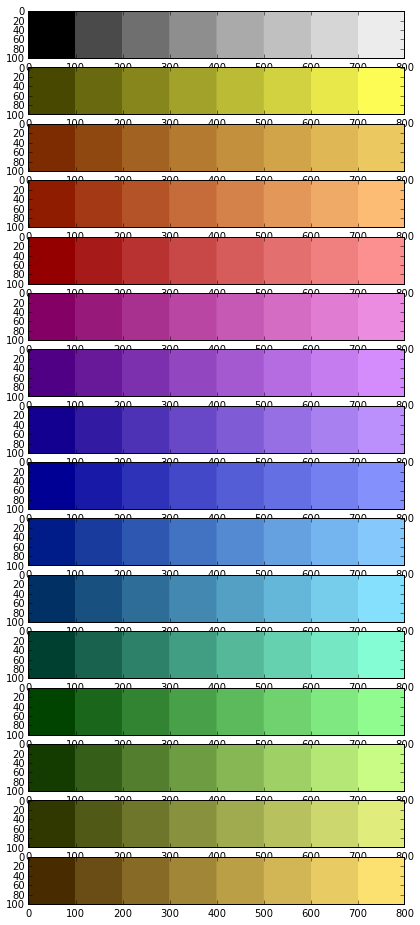

In [5]:
v_agent = ALEVisionAgent.ALEVisionAgent()
#visualize the atari color palette
palette = v_agent.as_RGB(np.tile(np.tile(np.arange(0,255,2),(100,1)).T.flatten(),(100,1)))
f, axes = plt.subplots(16,1,figsize=(16,16))
for i in range(16):
    axes[i].imshow(palette[:,i*800:(i+1)*800])


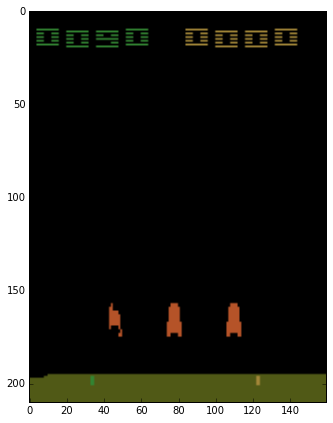

In [6]:
#display space_invaders background

with open(ale_dir+'/data/space_invaders/background.pkl','rb') as f:
    bgr = pickle.load(f).reshape((210,160))
plt.figure(figsize=(7,7))
plt.imshow(v_agent.as_RGB(bgr))

In [7]:
bg = ale_dir+'data/space_invaders/background.pkl'
features = BasicALEFeatures(num_tiles=np.array([14,16]),background_file=bg)

In [8]:
#load space invaders frames
with open(ale_dir+'/data/space_invaders/frames.pkl','rb') as f:
    frames = pickle.load(f) 

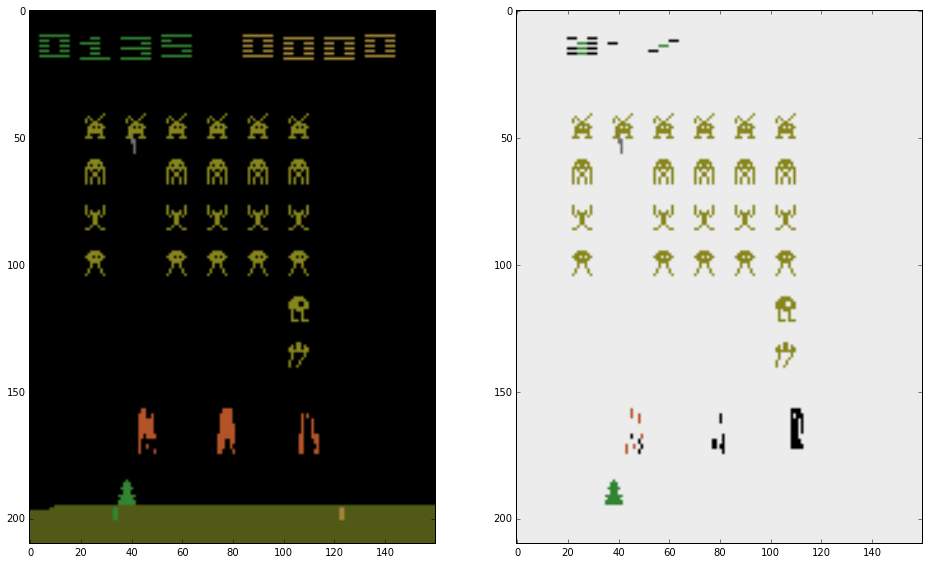

In [9]:
#display random frame and subtract background
f_id = np.random.randint(0,frames.shape[0])

frame = frames[f_id].reshape((210,160))
frame_no_bgr = features.subtract_background(frame.flatten(),fill_color=14).reshape((210,160))

f, (ax1,ax2)= plt.subplots(1,2,figsize=(16,16))
ax1.imshow(v_agent.as_RGB(frame))
ax2.imshow(v_agent.as_RGB(frame_no_bgr))

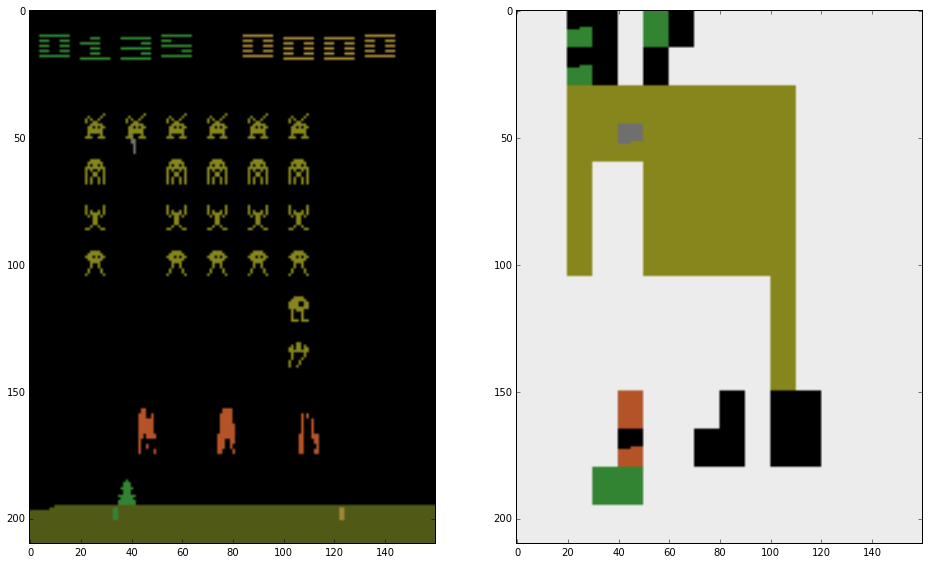

In [10]:
#visualize the the features used by basic features, each tile is colored according to the detected color features
color_features = features.color_detection(frame.flatten(),fill_color=14).reshape((210,160))
f, (ax1,ax2)= plt.subplots(1,2,figsize=(16,16))
#original frame
ax1.imshow(v_agent.as_RGB(frame))
#extracted features
ax2.imshow(v_agent.as_RGB(color_features))